# Redes Neurais Convolucionais (CNNs): Teoria e Prática

Este notebook fornece uma introdução abrangente às Redes Neurais Convolucionais (CNNs), abordando tanto conceitos teóricos quanto implementações práticas. Ao final deste notebook, você compreenderá como as CNNs funcionam, seus componentes principais, arquiteturas populares e como implementá-las usando TensorFlow/Keras.

## Sumário

1. [Introdução às Redes Neurais Convolucionais](#introducao)
2. [Conceitos Fundamentais e Componentes](#conceitos)
3. [Arquiteturas de CNN](#arquiteturas)
4. [Aplicações Práticas](#aplicacoes)
5. [Implementação Prática](#implementacao)
   - [Configurando o Ambiente](#configuracao)
   - [Carregando e Explorando o Dataset](#dataset)
   - [Construindo uma CNN Simples](#cnn-simples)
   - [Treinamento e Avaliação](#treinamento)
   - [Visualizando Mapas de Características e Filtros](#visualizacao)
   - [Implementando um Modelo Inspirado no LeNet-5](#lenet)
   - [Comparando o Desempenho dos Modelos](#comparacao)
6. [Desafios e Direções Futuras](#desafios)
7. [Conclusão](#conclusao)

<a id='introducao'></a>
## 1. Introdução às Redes Neurais Convolucionais

As Redes Neurais Convolucionais (CNNs) representam uma classe revolucionária de algoritmos de aprendizado profundo especificamente projetados para processar dados em forma de grade, com sua aplicação mais proeminente sendo na visão computacional. Diferentemente das redes neurais tradicionais, as CNNs são projetadas para extrair características hierárquicas dos dados de entrada de forma automática e eficiente, tornando-as excepcionalmente poderosas para tarefas como classificação de imagens, detecção de objetos e segmentação de imagens.

A inspiração fundamental por trás das CNNs vem da organização do córtex visual animal, onde neurônios individuais respondem a estímulos apenas em uma região restrita do campo visual, conhecida como campo receptivo. Esses neurônios trabalham coletivamente para cobrir toda a área visual, criando um sistema poderoso para processar informações visuais. De maneira similar, as CNNs empregam uma arquitetura especializada que aproveita relações espaciais nos dados através de padrões de conectividade local, pesos compartilhados e operações de pooling.

O que torna as CNNs particularmente eficazes é sua capacidade de aprender características relevantes diretamente dos dados brutos, sem necessidade de engenharia manual de características. Esta capacidade de extração automática de características revolucionou campos que vão desde a visão computacional até diagnósticos médicos, direção autônoma e muito mais.

<a id='conceitos'></a>
## 2. Conceitos Fundamentais e Componentes das CNNs

### A Operação de Convolução

No coração das CNNs está a operação de convolução, que dá a estas redes o seu nome. Matematicamente, a convolução é uma operação em duas funções que produz uma terceira função expressando como a forma de uma é modificada pela outra. No contexto das CNNs, esta operação envolve deslizar uma pequena matriz (chamada de filtro ou kernel) através dos dados de entrada e calcular multiplicações elemento a elemento seguidas de soma.

A operação de convolução pode ser representada matematicamente como:

```
y(i,j) = Σ Σ x(i-m, j-n) * w(m,n)
```

Onde:
- x representa os dados de entrada (como uma imagem)
- w é o kernel ou filtro
- y é o mapa de características resultante

Esta operação permite que as CNNs detectem várias características nos dados de entrada, como bordas, texturas e padrões mais complexos à medida que avançamos mais profundamente na rede. Cada filtro é especializado para detectar padrões específicos, e a rede aprende os valores ótimos para estes filtros durante o treinamento.

### Camadas Convolucionais

As camadas convolucionais formam os blocos de construção primários de uma arquitetura CNN. Nestas camadas, um conjunto de filtros aprendíveis é aplicado aos dados de entrada para produzir mapas de características. Cada filtro desliza através da entrada, realizando a operação de convolução em cada posição. As características principais das camadas convolucionais incluem:

1. **Conectividade Local**: Diferentemente das camadas totalmente conectadas, onde cada neurônio se conecta a todos os neurônios da camada anterior, os neurônios nas camadas convolucionais conectam-se apenas a uma pequena região do volume de entrada. Isso reduz drasticamente o número de parâmetros, tornando a rede mais eficiente.

2. **Compartilhamento de Parâmetros**: Os mesmos pesos de filtro são usados em todo o espaço de entrada, o que significa que um detector de características que é útil em uma parte da imagem provavelmente é útil em outra parte também. Isso reduz ainda mais o número de parâmetros e torna a rede mais eficiente.

3. **Hierarquia Espacial**: À medida que empilhamos múltiplas camadas convolucionais, a rede pode aprender características cada vez mais complexas. As camadas iniciais podem detectar características simples como bordas e cantos, enquanto camadas mais profundas podem reconhecer padrões mais complexos como rostos ou objetos.

### Funções de Ativação

Após a operação de convolução, uma função de ativação é aplicada para introduzir não-linearidade no modelo. A função de ativação mais comumente usada em CNNs é a Unidade Linear Retificada (ReLU), que é definida como:

```
f(x) = max(0, x)
```

A ReLU simplesmente substitui todos os valores negativos no mapa de características por zero, permitindo um treinamento mais rápido e eficaz em comparação com funções de ativação tradicionais como sigmoid ou tanh. Outras variantes incluem Leaky ReLU, Parametric ReLU e ELU (Exponential Linear Unit), cada uma com suas próprias vantagens em cenários específicos.

### Camadas de Pooling

As camadas de pooling são periodicamente inseridas entre camadas convolucionais sucessivas para reduzir as dimensões espaciais (largura e altura) dos dados que fluem através da rede. Isso serve a vários propósitos:

1. **Redução de Dimensionalidade**: Ao reduzir o tamanho dos mapas de características, o pooling diminui a carga computacional para camadas subsequentes.

2. **Invariância à Translação**: O pooling ajuda a rede a se tornar mais robusta a pequenas translações ou deslocamentos nos dados de entrada.

3. **Seleção de Características**: O pooling extrai as características mais proeminentes de cada região, descartando detalhes menos importantes.

As operações de pooling mais comuns são:

- **Max Pooling**: Pega o valor máximo de cada região local, efetivamente selecionando a característica mais proeminente.
- **Average Pooling**: Calcula o valor médio de cada região local, fornecendo uma representação mais holística.
- **Global Pooling**: Reduz cada mapa de características a um único valor, frequentemente usado antes de camadas totalmente conectadas.

### Camadas Totalmente Conectadas

Após várias camadas convolucionais e de pooling, o raciocínio de alto nível na rede neural é feito via camadas totalmente conectadas. Estas camadas conectam cada neurônio em uma camada a cada neurônio na próxima camada, similar às redes neurais tradicionais. O propósito das camadas totalmente conectadas é:

1. **Achatar os Dados**: Converter os mapas de características 3D em um vetor de características 1D.
2. **Combinar Características**: Integrar características de diferentes partes da entrada.
3. **Classificação**: Realizar a tarefa final de classificação ou regressão com base nas características extraídas.

### Dropout e Regularização

Para prevenir o overfitting, as CNNs frequentemente empregam técnicas de regularização como o dropout. O dropout desativa aleatoriamente uma fração de neurônios durante o treinamento, forçando a rede a aprender características mais robustas que não dependem de combinações específicas de neurônios. Isso melhora a generalização para dados não vistos.

Outras técnicas de regularização incluem:
- Regularização L1 e L2 (weight decay)
- Normalização em lote (batch normalization)
- Aumento de dados (data augmentation) (expandindo artificialmente o conjunto de dados de treinamento através de transformações)

<a id='arquiteturas'></a>
## 3. Arquiteturas de CNN

O campo de design de arquitetura CNN evoluiu rapidamente desde a introdução do LeNet no final dos anos 1990. Cada nova arquitetura trouxe inovações que ampliaram os limites do que é possível com o aprendizado profundo. Aqui está uma visão geral das arquiteturas CNN mais influentes:

### LeNet-5 (1998)

Desenvolvida por Yann LeCun e seus colegas, LeNet-5 foi uma das primeiras CNNs projetadas para reconhecimento de dígitos manuscritos. Apesar de sua relativa simplicidade pelos padrões atuais, ela estabeleceu os conceitos fundamentais das redes convolucionais:

- Utilizava convoluções 5x5 com stride 1
- Empregava camadas de average pooling
- Tinha duas camadas convolucionais seguidas por três camadas totalmente conectadas
- Continha aproximadamente 60.000 parâmetros

LeNet-5 alcançou notável sucesso no reconhecimento de dígitos manuscritos e foi usada por bancos para processar cheques. Sua arquitetura estabeleceu as bases para futuros designs de CNN.

### AlexNet (2012)

AlexNet, desenvolvida por Alex Krizhevsky, Ilya Sutskever e Geoffrey Hinton, marcou um momento decisivo na história do aprendizado profundo quando venceu o ImageNet Large Scale Visual Recognition Challenge (ILSVRC) em 2012 por uma margem significativa. As inovações do AlexNet incluíram:

- Arquitetura mais profunda com 5 camadas convolucionais e 3 camadas totalmente conectadas
- Uso de funções de ativação ReLU em vez de tanh ou sigmoid
- Implementação de dropout para regularização
- Técnicas de aumento de dados para reduzir overfitting
- Treinamento em múltiplas GPUs
- Normalização de resposta local

Com aproximadamente 60 milhões de parâmetros, AlexNet demonstrou o poder das redes convolucionais profundas e despertou um interesse renovado no aprendizado profundo para visão computacional.

### VGGNet (2014)

Desenvolvida pelo Visual Geometry Group em Oxford, VGGNet simplificou o design de arquitetura CNN usando elementos consistentes em toda a rede. Suas características principais eram:

- Rede muito profunda (16-19 camadas)
- Uso exclusivo de filtros de convolução 3x3 com stride 1
- Camadas de max pooling 2x2 com stride 2
- Padding igual para preservar dimensões espaciais
- Número crescente de filtros à medida que a rede se aprofunda

Apesar de sua simplicidade, VGG alcançou excelente desempenho e ainda é amplamente usada como extrator de características devido à sua arquitetura uniforme e boas capacidades de generalização. No entanto, com 138 milhões de parâmetros, é computacionalmente cara.

### GoogLeNet/Inception (2014)

GoogLeNet, desenvolvida por pesquisadores do Google, introduziu o "módulo Inception" que permitiu computação mais eficiente e redes mais profundas. Inovações principais incluíram:

- Uso de convoluções 1x1 para reduzir a dimensionalidade antes de convoluções 3x3 e 5x5 mais caras
- Caminhos paralelos dentro de cada módulo para capturar características em diferentes escalas
- Classificadores auxiliares durante o treinamento para combater o problema do gradiente de desaparecimento
- Pooling global médio em vez de camadas totalmente conectadas no final

Com apenas 4 milhões de parâmetros (significativamente menos que AlexNet ou VGG), GoogLeNet alcançou desempenho estado-da-arte enquanto era computacionalmente eficiente.

### ResNet (2015)

Redes Residuais (ResNet), introduzidas por pesquisadores da Microsoft, abordaram o problema de treinar redes muito profundas introduzindo conexões de atalho ou "shortcuts" que permitem que os gradientes fluam mais facilmente através da rede. Características principais incluem:

- Introdução de blocos residuais com atalhos de identidade
- Arquiteturas extremamente profundas (até 152 camadas)
- Normalização em lote após cada convolução
- Pooling global médio antes da camada totalmente conectada final

A inovação da ResNet permitiu o treinamento de redes muito mais profundas do que era possível anteriormente, e variantes da ResNet continuam sendo amplamente utilizadas em várias tarefas de visão computacional.

<a id='aplicacoes'></a>
## 4. Aplicações Práticas das CNNs

As Redes Neurais Convolucionais transformaram numerosos campos através de suas poderosas capacidades de extração de características. Aqui estão algumas das aplicações mais impactantes:

### Reconhecimento e Classificação de Imagens

A aplicação mais fundamental das CNNs é a classificação de imagens, onde a rede é treinada para categorizar imagens em classes predefinidas. Esta tecnologia alimenta:

- Organização de fotos em aplicativos como Google Fotos
- Filtragem de conteúdo em plataformas de mídia social
- Categorização de produtos em e-commerce
- Identificação de espécies de plantas e animais

### Detecção e Localização de Objetos

Além da simples classificação, as CNNs podem identificar múltiplos objetos dentro de uma imagem e localizá-los com caixas delimitadoras. Esta capacidade é crucial para:

- Veículos autônomos para detectar pedestres, veículos e sinais de trânsito
- Sistemas de segurança para vigilância e detecção de ameaças
- Análise de varejo para rastrear comportamento do cliente e posicionamento de produtos
- Monitoramento de vida selvagem e esforços de conservação

### Segmentação de Imagem

A segmentação de imagem envolve classificar cada pixel em uma imagem, permitindo a delineação precisa de objetos. Aplicações incluem:

- Imagens médicas para detecção de tumores e segmentação de órgãos
- Análise de imagens de satélite para classificação do uso da terra
- Realidade aumentada para compreensão de cenas
- Controle de qualidade industrial para detecção de defeitos

### Imagens Médicas e Diagnósticos

As CNNs revolucionaram as imagens médicas fornecendo ferramentas de análise automatizadas que podem:

- Detectar anormalidades em raios-X, tomografias computadorizadas e ressonâncias magnéticas
- Identificar células cancerosas em lâminas de patologia
- Segmentar órgãos e tecidos para planejamento cirúrgico
- Prever a progressão de doenças a partir de dados de imagens longitudinais

### Direção Autônoma e Robótica

A visão computacional alimentada por CNNs é essencial para sistemas autônomos perceberem e compreenderem seu ambiente:

- Detecção de faixas e segmentação de estradas
- Reconhecimento de sinais de trânsito
- Detecção de pedestres e veículos
- Evitação de obstáculos e planejamento de rotas
- Localização e mapeamento simultâneos visuais (SLAM)

### Processamento de Linguagem Natural

Embora principalmente associadas à visão computacional, as CNNs também foram aplicadas a dados de texto para:

- Classificação de texto e análise de sentimento
- Reconhecimento de entidades nomeadas
- Tradução automática
- Classificação de documentos

### Análise de Vídeo

Estendendo-se além de imagens estáticas, as CNNs podem analisar conteúdo de vídeo para:

- Reconhecimento de ações em análises esportivas
- Detecção de anomalias em filmagens de vigilância
- Resumo de vídeo e recuperação baseada em conteúdo
- Reconhecimento de emoções a partir de expressões faciais

<a id='implementacao'></a>
## 5. Implementação Prática

Nesta seção, implementaremos CNNs usando TensorFlow e Keras para demonstrar os conceitos discutidos nas seções teóricas. Construiremos, treinaremos e avaliaremos modelos CNN no dataset CIFAR-10, que consiste em 60.000 imagens coloridas de 32x32 em 10 classes.

<a id='configuracao'></a>
### Configurando o Ambiente

Primeiro, vamos importar as bibliotecas necessárias e configurar nosso ambiente.

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
import os

# Definir semente aleatória para reprodutibilidade
np.random.seed(42)
tf.random.set_seed(42)

# Criar um diretório para salvar visualizações
os.makedirs('images', exist_ok=True)

# Verificar versão do TensorFlow
print(f"Versão do TensorFlow: {tf.__version__}")
print(f"Versão do Keras: {tf.keras.__version__}")

Versão do TensorFlow: 2.19.0
Versão do Keras: 3.9.2


<a id='dataset'></a>
### Carregando e Explorando o Dataset

Em seguida, vamos carregar o dataset CIFAR-10 e explorar sua estrutura.

In [51]:
# Carregar e preparar o dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Imprimir formas dos datasets
print(f"Forma das imagens de treino: {train_images.shape}")
print(f"Forma dos rótulos de treino: {train_labels.shape}")
print(f"Forma das imagens de teste: {test_images.shape}")
print(f"Forma dos rótulos de teste: {test_labels.shape}")

# Normalizar valores de pixels para estarem entre 0 e 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Converter rótulos para codificação one-hot
train_labels_one_hot = to_categorical(train_labels, 10)
test_labels_one_hot = to_categorical(test_labels, 10)

# Definir nomes das classes para CIFAR-10
class_names = ['avião', 'automóvel', 'pássaro', 'gato', 'veado',
               'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

Forma das imagens de treino: (50000, 32, 32, 3)
Forma dos rótulos de treino: (50000, 1)
Forma das imagens de teste: (10000, 32, 32, 3)
Forma dos rótulos de teste: (10000, 1)


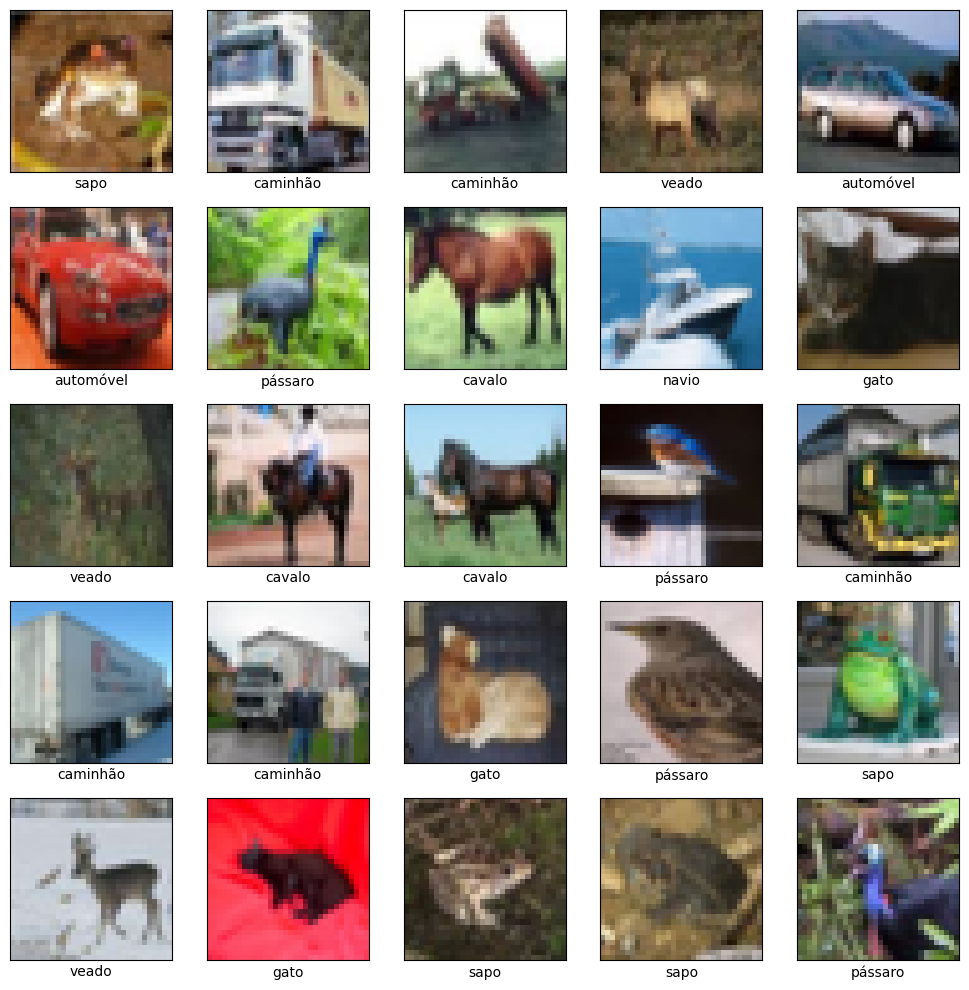

In [52]:
# Função para plotar imagens
def plot_images(images, labels, class_names, filename=None):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i])
        plt.xlabel(class_names[labels[i]])
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()

# Plotar algumas imagens de exemplo
plot_images(train_images[:25], train_labels.reshape(-1), class_names)

<a id='cnn-simples'></a>
### Construindo uma CNN Simples

Agora, vamos construir um modelo CNN simples para o dataset CIFAR-10.

In [53]:
# Função para criar um modelo CNN simples para CIFAR-10
def create_simple_cnn():
    model = models.Sequential([
        # Primeiro Bloco Convolucional
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv1'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), name='pool1'),
        
        # Segundo Bloco Convolucional
        layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), name='pool2'),
        
        # Terceiro Bloco Convolucional
        layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='conv3'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2), name='pool3'),
            
        # Camadas de Achatamento e Densas
        layers.Flatten(),
        layers.Dense(128, activation='relu', name='dense1'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax', name='output')
    ])
    
    # Compilar o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Criar o modelo
simple_model = create_simple_cnn()

# Exibir o resumo do modelo
simple_model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool3 (MaxPooling2D)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 357,706 (1.36 MB)

 Trainable params: 357,258 (1.36 MB)

 Non-trainable params: 448 (1.75 KB)

<a id='treinamento'></a>
### Treinamento e Avaliação

Vamos treinar nosso modelo CNN e avaliar seu desempenho.

In [54]:
# Função para plotar o histórico de treinamento do modelo
def plot_training_history(history, filename=None):
    plt.figure(figsize=(12, 5))
    
    # Plotar acurácia de treino e validação
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Acurácia do Modelo')
    plt.ylabel('Acurácia')
    plt.xlabel('Época')
    plt.legend(['Treino', 'Validação'], loc='lower right')
    
    # Plotar perda de treino e validação
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Perda do Modelo')
    plt.ylabel('Perda')
    plt.xlabel('Época')
    plt.legend(['Treino', 'Validação'], loc='upper right')
    
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()

In [55]:
# Treinar o modelo com early stopping
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True)

history = simple_model.fit(
    train_images, train_labels_one_hot,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.3262 - loss: 1.9107 - val_accuracy: 0.5071 - val_loss: 1.4026
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.5086 - loss: 1.3716 - val_accuracy: 0.4553 - val_loss: 1.7496
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.5934 - loss: 1.1486 - val_accuracy: 0.6521 - val_loss: 0.9729
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.6425 - loss: 1.0107 - val_accuracy: 0.5819 - val_loss: 1.2258
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.6844 - loss: 0.9003 - val_accuracy: 0.6969 - val_loss: 0.8745
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7160 - loss: 0.8083 - val_accuracy: 0.6842 - val_loss: 0.9007
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.7416 - loss: 0.7377 - val_accuracy: 0.7192 - val_loss: 0.8192
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 40ms/step - accuracy: 0.7648 - loss: 0.6775 - 

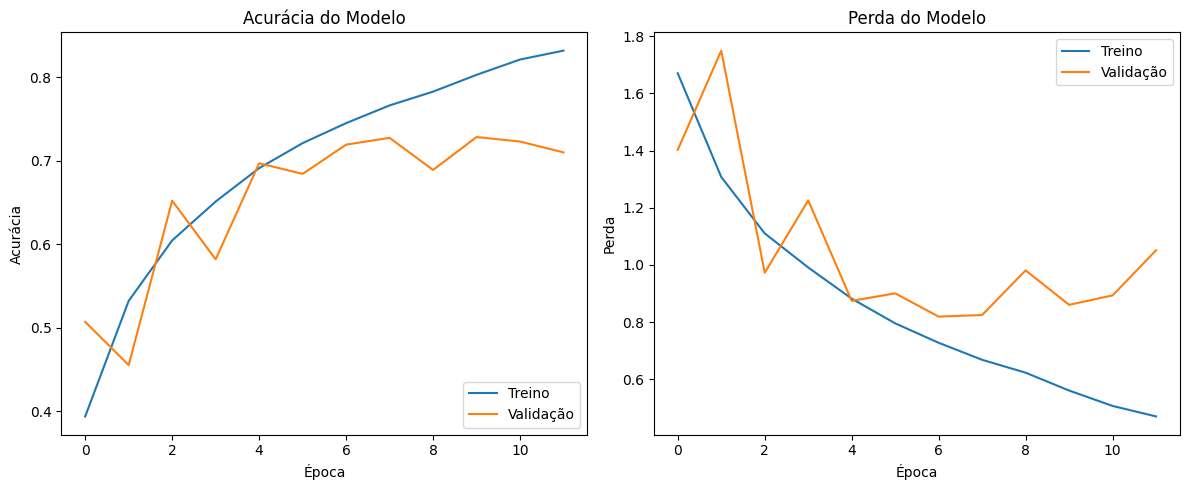

In [56]:
# Plotar histórico de treinamento
plot_training_history(history)

In [57]:
# Avaliar o modelo
test_loss, test_acc = simple_model.evaluate(test_images, test_labels_one_hot, verbose=2)
print(f"Acurácia de teste: {test_acc:.4f}")

313/313 - 1s - 4ms/step - accuracy: 0.7151 - loss: 0.8504
Acurácia de teste: 0.7151


<a id='visualizacao'></a>
### Visualizando Mapas de Características e Filtros

Vamos visualizar os mapas de características e filtros aprendidos pelo nosso modelo CNN para entender melhor o que ele está aprendendo.

In [58]:
def visualize_feature_maps(model, image, layer_name, filename=None):
    # Garante que a imagem tenha o shape certo: (1, 32, 32, 3)
    image = np.expand_dims(image, axis=0)

    # Acha a camada desejada
    layer = model.get_layer(name=layer_name)

    # Cria um modelo de entrada até a camada desejada
    activation_model = tf.keras.models.Model(
        inputs=model.layers[0].input,  # pega a entrada da primeira camada
        outputs=layer.output
    )

    # Gera as ativações
    feature_maps = activation_model.predict(image)

    # Plotar os mapas de características
    plt.figure(figsize=(15, 8))
    num_features = min(16, feature_maps.shape[-1])
    for i in range(num_features):
        plt.subplot(4, 4, i + 1)
        plt.imshow(feature_maps[0, :, :, i], cmap='viridis')
        plt.axis('off')

    plt.suptitle(f'Mapas de Características da camada {layer_name}')
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()


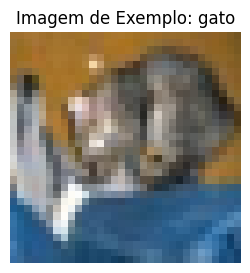

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


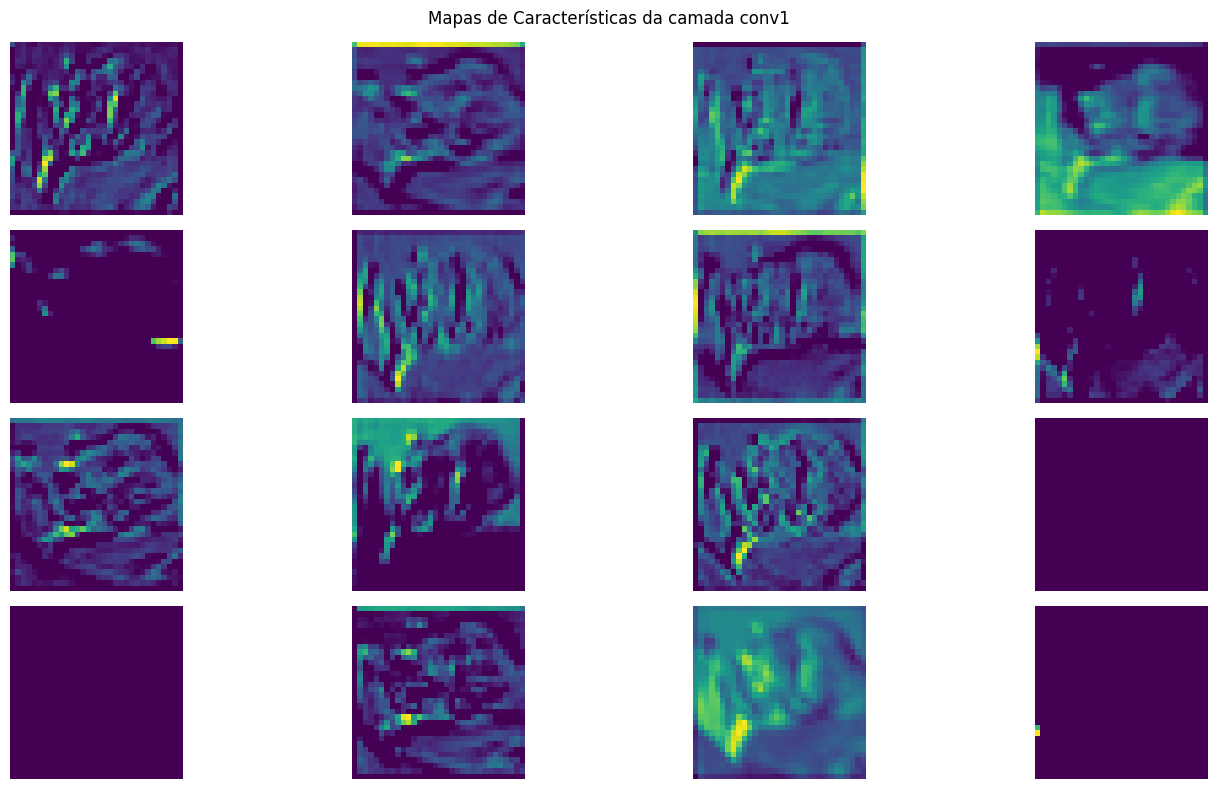

In [59]:
# Visualizar mapas de características da primeira camada convolucional
sample_image = test_images[0]
plt.figure(figsize=(3, 3))
plt.imshow(sample_image)
plt.title(f"Imagem de Exemplo: {class_names[test_labels[0][0]]}")
plt.axis('off')
plt.show()

visualize_feature_maps(simple_model, sample_image, 'conv1')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


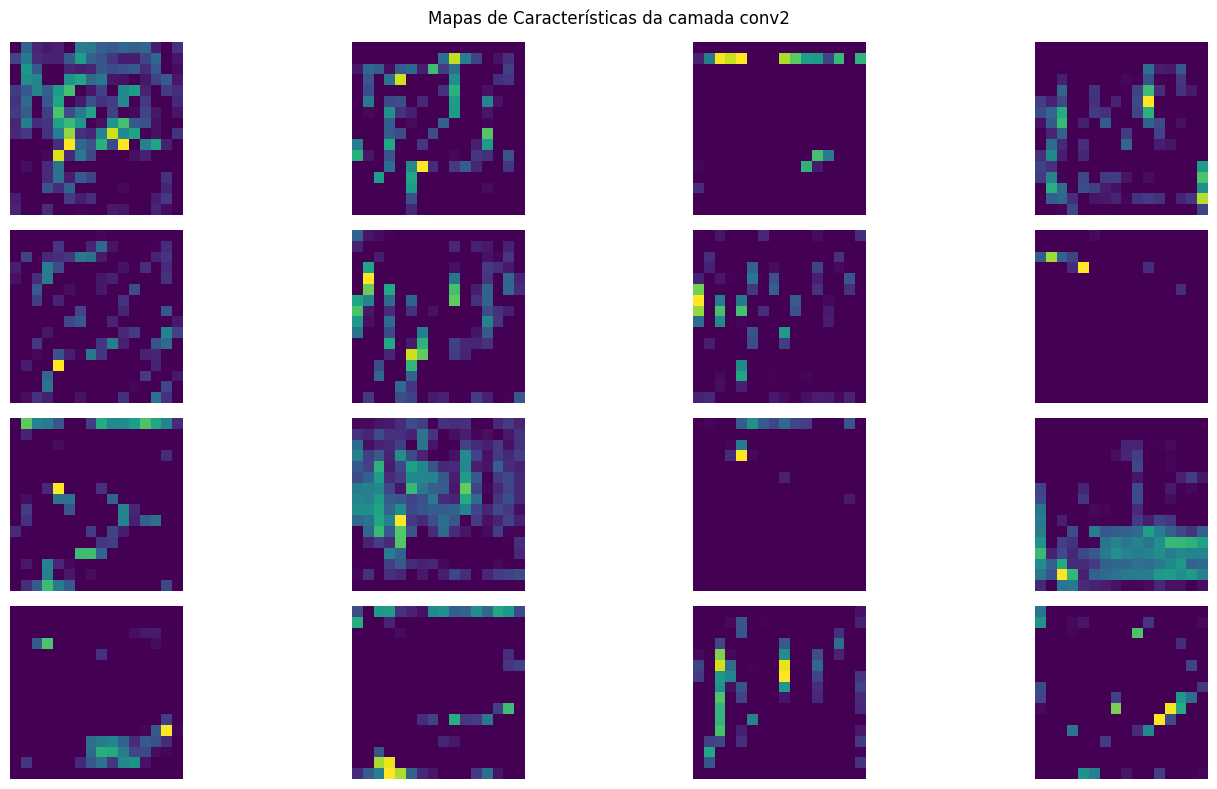

In [60]:
# Visualizar mapas de características da segunda camada convolucional
visualize_feature_maps(simple_model, sample_image, 'conv2')

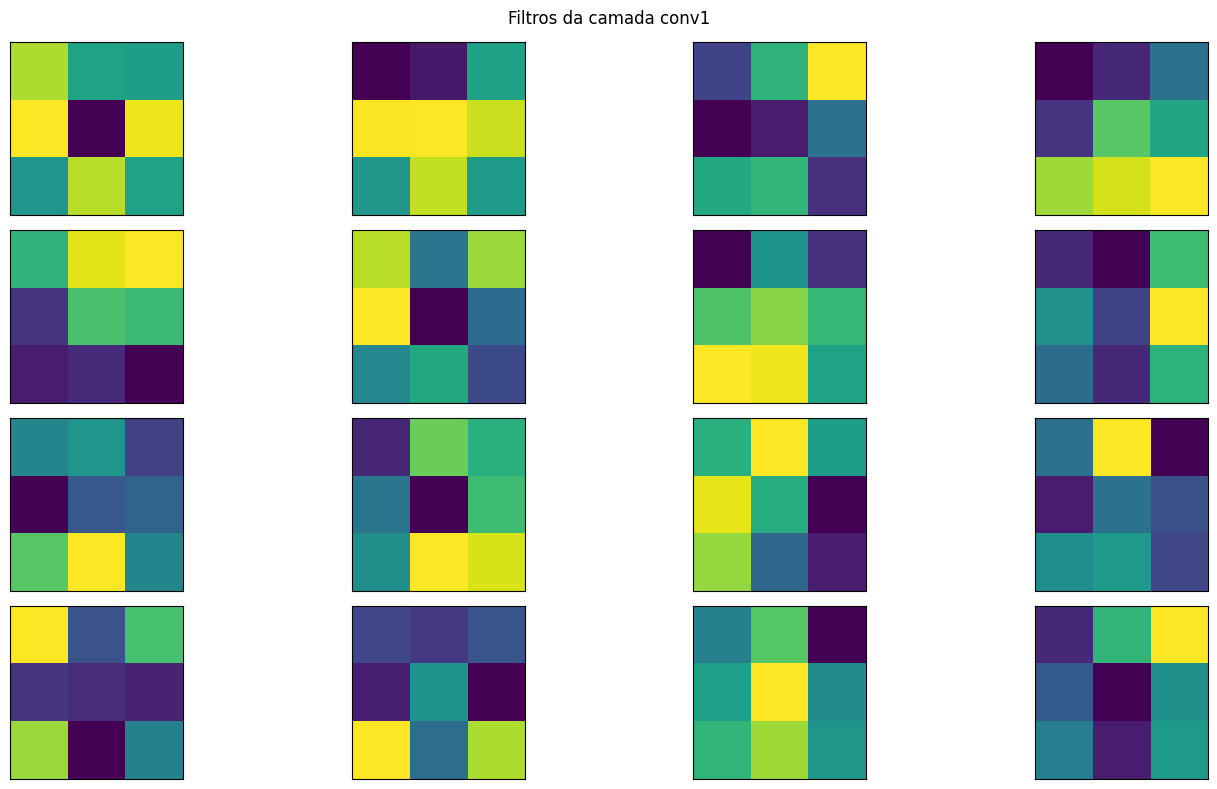

In [61]:
# Função para visualizar filtros
def visualize_filters(model, layer_name, filename=None):
    # Obter a camada
    for layer in model.layers:
        if layer.name == layer_name:
            filters, biases = layer.get_weights()
            break
    
    # Normalizar valores do filtro para 0-1
    f_min, f_max = filters.min(), filters.max()
    filters = (filters - f_min) / (f_max - f_min)
    
    # Plotar os filtros
    plt.figure(figsize=(15, 8))
    
    # Plotar até 16 filtros ou todos se menos que 16
    num_filters = min(16, filters.shape[-1])
    for i in range(num_filters):
        plt.subplot(4, 4, i + 1)
        # Para imagens RGB, visualizaremos o filtro para o primeiro canal
        plt.imshow(filters[:, :, 0, i], cmap='viridis')
        plt.xticks([])
        plt.yticks([])
    
    plt.suptitle(f'Filtros da camada {layer_name}')
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
    plt.show()

# Visualizar filtros da primeira camada convolucional
visualize_filters(simple_model, 'conv1')

<a id='lenet'></a>
### Implementando um Modelo Inspirado no LeNet-5

Agora, vamos implementar um modelo inspirado no LeNet-5 e comparar seu desempenho com nossa CNN simples.

In [62]:
# Função para criar um modelo inspirado no LeNet-5
def create_lenet_model():
    model = models.Sequential([
        # Primeira Camada Convolucional
        layers.Conv2D(6, (5, 5), activation='relu', padding='same', input_shape=(32, 32, 3), name='conv1_lenet'),
        layers.AveragePooling2D((2, 2), name='pool1_lenet'),
        
        # Segunda Camada Convolucional
        layers.Conv2D(16, (5, 5), activation='relu', name='conv2_lenet'),
        layers.AveragePooling2D((2, 2), name='pool2_lenet'),
        
        # Camadas de Achatamento e Densas
        layers.Flatten(),
        layers.Dense(120, activation='relu', name='dense1_lenet'),
        layers.Dense(84, activation='relu', name='dense2_lenet'),
        layers.Dense(10, activation='softmax', name='output_lenet')
    ])
    
    # Compilar o modelo
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

# Criar o modelo LeNet
lenet_model = create_lenet_model()

# Exibir o resumo do modelo
lenet_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1_lenet (Conv2D)            │ (None, 32, 32, 6)      │           456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1_lenet (AveragePooling2D)  │ (None, 16, 16, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2_lenet (Conv2D)            │ (None, 12, 12, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2_lenet (AveragePooling2D)  │ (None, 6, 6, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1_lenet (Dense)            │ (None, 120)            │        69,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2_lenet (Dense)            │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_lenet (Dense)            │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83,126 (324.71 KB)

 Trainable params: 83,126 (324.71 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
# Treinar o modelo LeNet
lenet_history = lenet_model.fit(
    train_images, train_labels_one_hot,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.2926 - loss: 1.9238 - val_accuracy: 0.4396 - val_loss: 1.5569
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4550 - loss: 1.5118 - val_accuracy: 0.5026 - val_loss: 1.3951
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5139 - loss: 1.3643 - val_accuracy: 0.5327 - val_loss: 1.3351
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5519 - loss: 1.2619 - val_accuracy: 0.5533 - val_loss: 1.2728
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5755 - loss: 1.1833 - val_accuracy: 0.5688 - val_loss: 1.2401
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5999 - loss: 1.1147 - val_accuracy: 0.5764 - val_loss: 1.2153
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6211 - loss: 1.0569 - val_accuracy: 0.5875 - val_loss: 1.1941
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.6410 - loss: 1.0097 - val_accuracy: 0

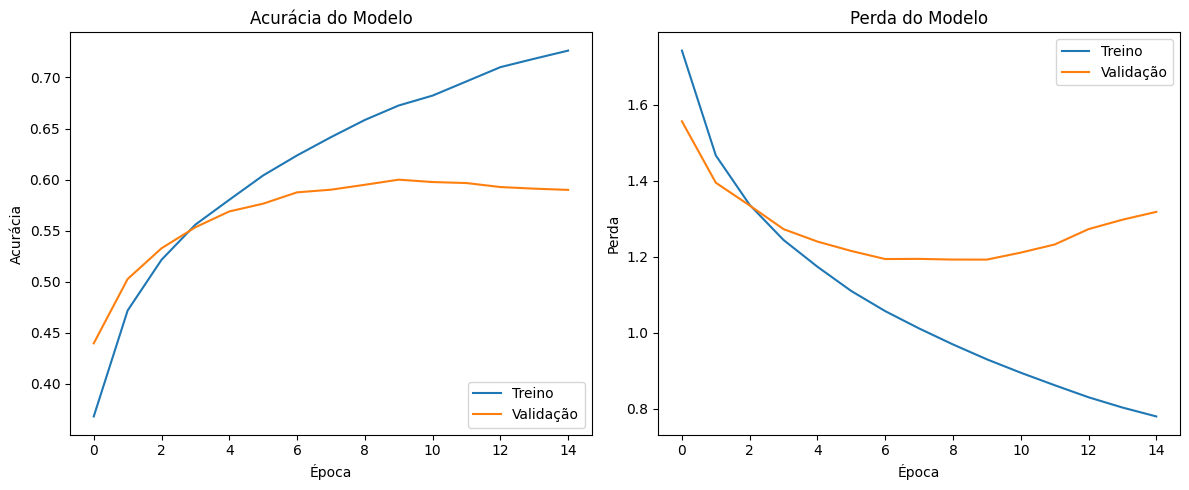

In [64]:
# Plotar histórico de treinamento do LeNet
plot_training_history(lenet_history)

In [65]:
# Avaliar o modelo LeNet
lenet_test_loss, lenet_test_acc = lenet_model.evaluate(test_images, test_labels_one_hot, verbose=2)
print(f"Acurácia de teste do LeNet: {lenet_test_acc:.4f}")

313/313 - 1s - 2ms/step - accuracy: 0.5956 - loss: 1.2093
Acurácia de teste do LeNet: 0.5956


<a id='comparacao'></a>
### Comparando o Desempenho dos Modelos

Vamos comparar as previsões de nossa CNN simples e dos modelos LeNet-5.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


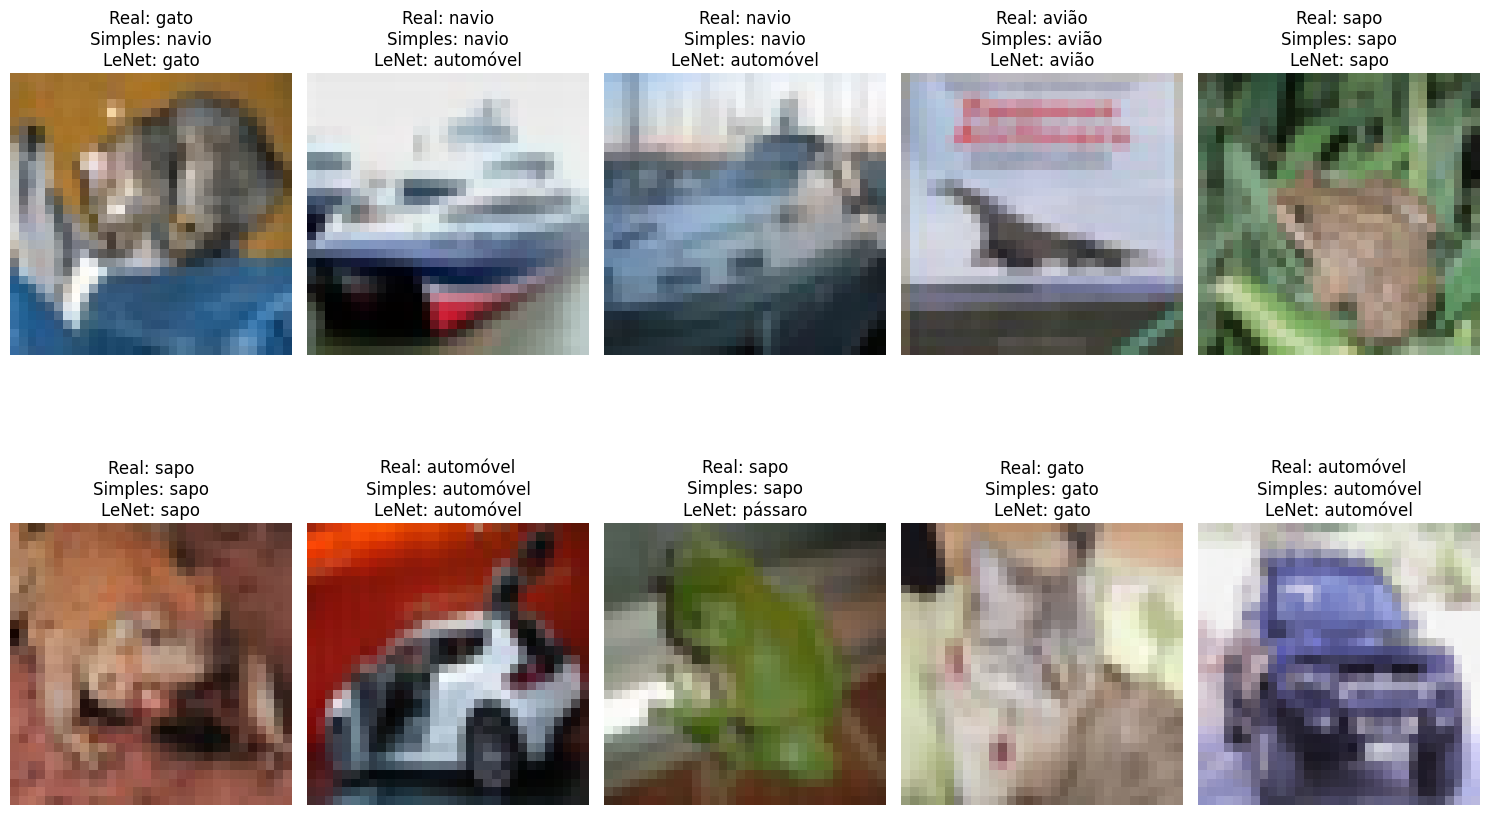

In [66]:
# Obter previsões de ambos os modelos
simple_predictions = simple_model.predict(test_images[:10])
lenet_predictions = lenet_model.predict(test_images[:10])

# Converter previsões para índices de classe
simple_pred_classes = np.argmax(simple_predictions, axis=1)
lenet_pred_classes = np.argmax(lenet_predictions, axis=1)
true_classes = test_labels[:10].reshape(-1)

# Exibir os resultados
plt.figure(figsize=(15, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i])
    plt.title(f"Real: {class_names[true_classes[i]]}\n"
             f"Simples: {class_names[simple_pred_classes[i]]}\n"
             f"LeNet: {class_names[lenet_pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

Acurácia de Teste da CNN Simples: 0.7151
Acurácia de Teste do LeNet-5: 0.5956


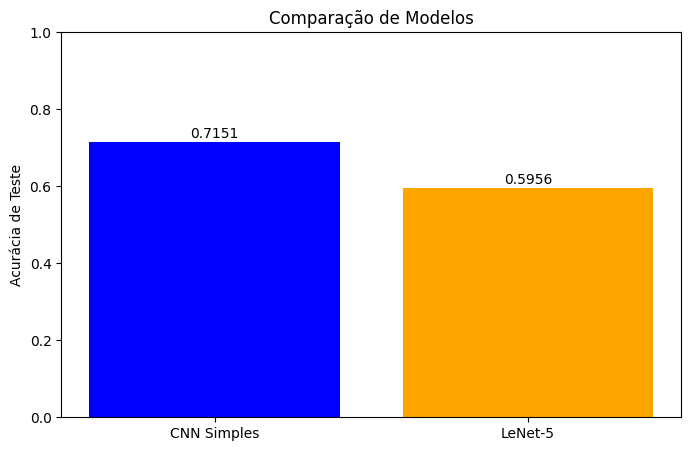

In [67]:
# Comparar desempenho dos modelos
print(f"Acurácia de Teste da CNN Simples: {test_acc:.4f}")
print(f"Acurácia de Teste do LeNet-5: {lenet_test_acc:.4f}")

# Criar um gráfico de barras para comparar acurácias
plt.figure(figsize=(8, 5))
models = ['CNN Simples', 'LeNet-5']
accuracies = [test_acc, lenet_test_acc]
plt.bar(models, accuracies, color=['blue', 'orange'])
plt.ylim(0, 1.0)
plt.ylabel('Acurácia de Teste')
plt.title('Comparação de Modelos')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()

<a id='desafios'></a>
## 6. Desafios e Direções Futuras

Apesar de seu notável sucesso, as CNNs enfrentam vários desafios que continuam a impulsionar a pesquisa no campo:

### Interpretabilidade e Explicabilidade

A natureza de "caixa preta" das redes neurais profundas torna difícil entender por que uma determinada decisão foi tomada. Técnicas como Grad-CAM, LIME e visualização de características visam fornecer insights sobre os processos de tomada de decisão das CNNs, o que é particularmente importante em aplicações críticas como saúde e direção autônoma.

### Eficiência Computacional

Treinar e implantar grandes modelos CNN requer recursos computacionais significativos. Pesquisas em compressão de modelos, quantização e design de arquitetura eficiente visam tornar as CNNs mais acessíveis para dispositivos de borda e ambientes com recursos limitados.

### Eficiência de Dados

As CNNs tipicamente requerem grandes quantidades de dados rotulados para treinamento. Abordagens de aprendizado com poucos exemplos (few-shot learning), aprendizado por transferência e aprendizado auto-supervisionado estão sendo desenvolvidas para reduzir essa dependência e permitir o aprendizado a partir de dados limitados.

### Robustez a Ataques Adversariais

As CNNs podem ser vulneráveis a exemplos adversariais—entradas cuidadosamente elaboradas projetadas para enganar a rede. Melhorar a robustez contra tais ataques é crucial para aplicações críticas de segurança.

### Considerações Éticas

À medida que as CNNs se tornam mais prevalentes na sociedade, preocupações éticas em torno de privacidade, viés e justiça devem ser abordadas. Garantir que os sistemas CNN sejam desenvolvidos e implantados de forma responsável é um desafio contínuo para o campo.

<a id='conclusao'></a>
## 7. Conclusão

As Redes Neurais Convolucionais transformaram fundamentalmente a forma como abordamos a visão computacional e outras tarefas de reconhecimento de padrões. Ao aprender automaticamente características hierárquicas a partir de dados, as CNNs permitiram avanços em numerosos campos e continuam a impulsionar a inovação em inteligência artificial.

Neste notebook, exploramos os fundamentos teóricos das CNNs, incluindo seus componentes principais, arquiteturas populares e aplicações práticas. Também implementamos e comparamos diferentes modelos CNN no dataset CIFAR-10, visualizando o que essas redes aprendem e como fazem previsões.

À medida que a pesquisa em aprendizado profundo continua a avançar, podemos esperar que as CNNs se tornem mais eficientes, interpretáveis e capazes de resolver problemas cada vez mais complexos. Compreender tanto os fundamentos teóricos quanto os detalhes de implementação prática das CNNs é essencial para qualquer pessoa que busque aplicar essas poderosas ferramentas a problemas do mundo real.